# 数据预处理  
**数据预处理**:是从数据中检测，纠正或删除损坏，不准确或不适用于模型的记录的过程
可能面对的问题有：数据类型不同，比如有的是文字，有的是数字，有的含时间序列，有的连续，有的间断。
也可能，数据的质量不行，有噪声，有异常，有缺失，数据出错，量纲不一，有重复，数据是偏态，数据量太
大或太小
数据预处理的目的：让数据适应模型，匹配模型的需求

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 数据归一化  
$$
x^{*}=\frac{x-\min (x)}{\max (x)-\min (x)}
$$

#### sklearn处理

In [9]:
# 给出特征
data = [[12, 16],
       [33, 55],
       [99, 100]]

In [10]:
pd.DataFrame(data, index=[1, 2, 3], columns=["fea1", "fear2"])

,fea1,fear2
1,12,16
2,33,55
3,99,100


In [11]:
from sklearn.preprocessing import MinMaxScaler
# 实例化（默认归一化到０～１）
scalar = MinMaxScaler()

In [12]:
# 得到结果
result = scalar.fit_transform(data)

In [13]:
result

array([[0.        , 0.        ],
       [0.24137931, 0.46428571],
       [1.        , 1.        ]])

In [14]:
# 恢复到原来的数据
scalar.inverse_transform(result)

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

In [15]:
# 归一化到某个范围
scalar_ = MinMaxScaler(feature_range=(5, 10))
scalar = scalar_.fit_transform(data)
scalar

array([[ 5.        ,  5.        ],
       [ 6.20689655,  7.32142857],
       [10.        , 10.        ]])

In [16]:
scalar_.inverse_transform(scalar)

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

#### 函数表示

In [17]:
X = np.array(data)
pd.DataFrame(X)

,0,1
0,12,16
1,33,55
2,99,100


In [18]:
# 归一化数据
result = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
result

array([[0.        , 0.        ],
       [0.24137931, 0.46428571],
       [1.        , 1.        ]])

In [19]:
# 显示归一化前的数据
X = result * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

### 2.标准化  N~(0, 1)
$$
x^{*}=\frac{x-\mu}{\sigma}
$$

#### sklearn处理

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# 求解标准化的数据
std = StandardScaler()
std = std.fit(data) # 得到方差和均值
std_result = std.transform(data)
std.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [22]:
## 查看每一个特征的方差和均值
std.mean_, std.var_

(array([48., 57.]), array([1374., 1178.]))

In [23]:
# 返回标准化之前的数据
std.inverse_transform(std_result)

array([[ 12.,  16.],
       [ 33.,  55.],
       [ 99., 100.]])

#### 函数实现

In [24]:
# 数据实现
std_result = (X - X.mean(axis=0))/X.std(axis=0)
std_result

array([[-0.97120103, -1.19456892],
       [-0.4046671 , -0.05827165],
       [ 1.37586813,  1.25284058]])

### 3.缺失值处理

In [25]:
data = pd.read_csv("data/Narrativedata.csv", index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


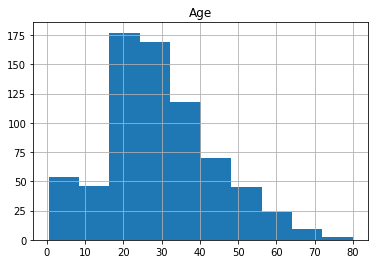

In [26]:
data.hist()
plt.show()

In [27]:
data.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [29]:
# 方法一
# Age数据中有部分缺失，使用均值添补
data1 = data.copy()
data1.Age.fillna(data.Age.mean, inplace=True)

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null object
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: object(4)
memory usage: 34.8+ KB


In [31]:
# 方法二
# 使用sklearn impute函数补充
data2 = data.copy()
from sklearn.impute import SimpleImputer

# 填充不同类型数据
imp_maen = SimpleImputer(missing_values=np.nan, strategy="mean") # 默认是均值
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

imp_maen = imp_maen.fit_transform(data2.Age.values.reshape(-1, 1)) # 填补特征值必须是二维
imp_median = imp_median.fit_transform(data2.Age.values.reshape(-1, 1))

print("mean:{}\nmedian:{}".format(imp_maen[:5, :], imp_median[:5, :]))

# 更新数据
data2.Age = imp_median

mean:[[22.]
 [38.]
 [26.]
 [35.]
 [35.]]
median:[[22.]
 [38.]
 [26.]
 [35.]
 [35.]]


In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [33]:
# 删除影响较小样本数据
data2.dropna(inplace=True)

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
Age         889 non-null float64
Sex         889 non-null object
Embarked    889 non-null object
Survived    889 non-null object
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null object
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: object(4)
memory usage: 34.8+ KB


In [36]:
data1

,Age,Sex,Embarked,Survived
0,22,male,S,No
1,38,female,C,Yes
2,26,female,S,Yes
3,35,female,S,Yes
4,35,male,S,No
5,<bound method Series.mean of 0 22.0\n1 ...,male,Q,No
6,54,male,S,No
7,2,male,S,No
8,27,female,S,Yes
9,14,female,C,Yes


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
Age         889 non-null float64
Sex         889 non-null object
Embarked    889 non-null object
Survived    889 non-null object
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


### 4.处理分类特征

#### 标签编码，　LabelEncoder

In [38]:
# 标签编码
from sklearn.preprocessing import LabelEncoder

In [39]:
# 取出标签
Y_label = data.iloc[:,-1]
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [40]:
Y_label

0           No
1          Yes
2          Yes
3          Yes
4           No
5           No
6           No
7           No
8          Yes
9          Yes
10     Unknown
11         Yes
12          No
13          No
14          No
15     Unknown
16          No
17         Yes
18          No
19         Yes
20     Unknown
21         Yes
22         Yes
23         Yes
24          No
25     Unknown
26          No
27          No
28         Yes
29          No
        ...   
861         No
862        Yes
863         No
864    Unknown
865    Unknown
866    Unknown
867         No
868         No
869        Yes
870         No
871    Unknown
872         No
873         No
874        Yes
875        Yes
876         No
877         No
878         No
879        Yes
880        Yes
881         No
882         No
883    Unknown
884         No
885         No
886         No
887        Yes
888         No
889    Unknown
890         No
Name: Survived, Length: 891, dtype: object

In [41]:
le = LabelEncoder()

In [42]:
data.iloc[:, -1] = le.fit_transform(Y_label)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [43]:
# 标签编码的类别
le.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [44]:
le.get_params()

{}

#### 特征编码

#### preprocessing.OrdinalEncoder：特征专用，能够将**分类特征转**换为分类数值

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
ord = OrdinalEncoder()
data_ = data2.copy()

In [47]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [48]:
data_.iloc[:, :-1] = ord.fit_transform(data_.iloc[:,:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,28.0,1.0,2.0,No
1,51.0,0.0,0.0,Yes
2,34.0,0.0,2.0,Yes
3,47.0,0.0,2.0,Yes
4,47.0,1.0,2.0,No


In [49]:
ord.categories_

[array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
         5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
        14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
        21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
        28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
        34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
        40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
        48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
        56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
        65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ]),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [50]:
data_.head()

,Age,Sex,Embarked,Survived
0,28.0,1.0,2.0,No
1,51.0,0.0,0.0,Yes
2,34.0,0.0,2.0,Yes
3,47.0,0.0,2.0,Yes
4,47.0,1.0,2.0,No


In [51]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
Age         889 non-null float64
Sex         889 non-null float64
Embarked    889 non-null float64
Survived    889 non-null object
dtypes: float64(3), object(1)
memory usage: 34.7+ KB


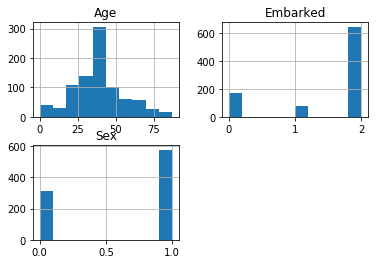

In [52]:
data_.hist()
plt.show()

#### preprocessing.OneHotEncoder：独热编码，创建哑变量

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
# 取出特征进行编码
fetaure = data2.iloc[:, 1:-1]
enc = OneHotEncoder(categories="auto").fit(fetaure)

In [55]:
result = enc.transform(fetaure)
result

<889x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1778 stored elements in Compressed Sparse Row format>

In [64]:
# 结果
pd_result = pd.DataFrame(result.toarray())
pd_result.head()

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [57]:
# 得到编码的特征名称
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [65]:
# 拼接数据，生成新的数据，删除修的特征
newdata = pd.concat([data2, pd_result], axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,No,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,No,0.0,1.0,0.0,0.0,1.0


In [58]:
newdata.drop(labels=["Sex", "Embarked"], axis=1, inplace=True)
newdata.dropna(inplace=True, axis=0)

In [59]:
# 添加新的数据标签
newdata.columns = ["Age", "Survived", 'x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S']

In [60]:
lbe = LabelEncoder()
newdata.loc[:, "Survived"] = lbe.fit_transform(newdata.loc[:, "Survived"])
newdata.head()

,Age,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [61]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 7 columns):
Age          887 non-null float64
Survived     887 non-null int64
x0_female    887 non-null float64
x0_male      887 non-null float64
x1_C         887 non-null float64
x1_Q         887 non-null float64
x1_S         887 non-null float64
dtypes: float64(6), int64(1)
memory usage: 55.4 KB


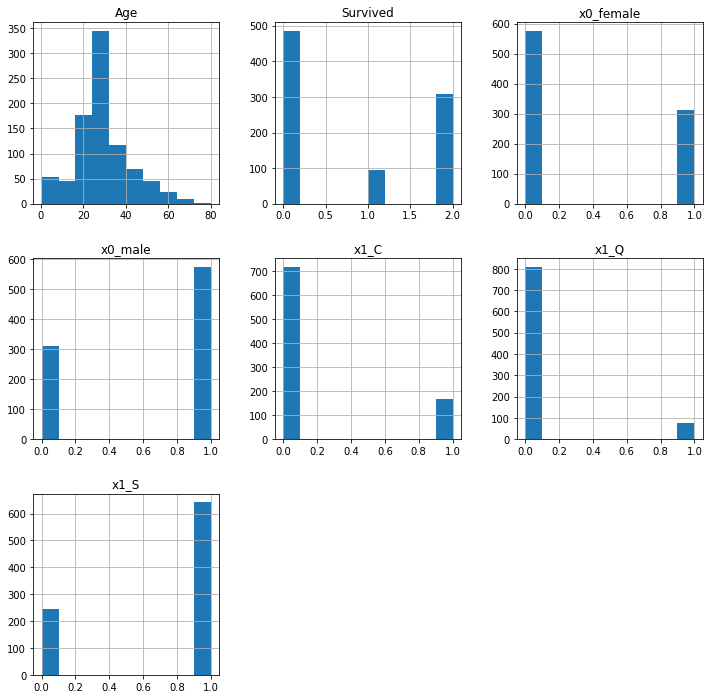

In [192]:
newdata.hist(figsize=(12, 12))
plt.savefig("imgs/data_hist.png")
plt.show()

In [193]:
# 数据保存
newdata.to_csv("./data/newdata")

### 5.处理连续特征

#### 二分类

In [87]:
data3 = data2.copy()
data3.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [88]:
# 年龄是连续属性的特征
from sklearn.preprocessing import Binarizer
Age_feature = data3.iloc[:, 0].values.reshape(-1, 1) # 注意：处理特征要是二维数据

In [90]:
ba = Binarizer(threshold=30)
age = ba.fit_transform(Age_feature)
age.sum()

303.0

In [219]:
ba.get_params()

{'copy': True, 'threshold': 30}

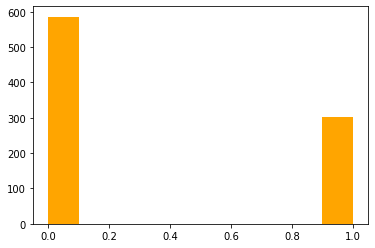

In [217]:
plt.hist(age, color="orange")
plt.show()

#### 多分类

In [99]:
from sklearn.preprocessing import KBinsDiscretizer

In [100]:
X = data2.iloc[:, 0].values.reshape(-1, 1)
X.shape

(889, 1)

{0.0, 1.0, 2.0}


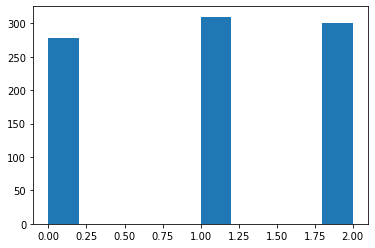

In [107]:
# 等位分箱
est = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
print(set(est.fit_transform(X).ravel()))
plt.hist(est.fit_transform(X))
plt.show()

In [102]:
est = KBinsDiscretizer(n_bins=3, encode="onehot", strategy="quantile")
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [103]:
est.inverse_transform(est.fit_transform(X))

array([[12.71],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [12.71],
       [28.  ],
       [12.71],
       [12.71],
       [55.5 ],
       [12.71],
       [55.5 ],
       [12.71],
       [55.5 ],
       [12.71],
       [28.  ],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [55.5 ],
       [12.71],
       [28.  ],
       [12.71],
       [55.5 ],
       [28.  ],
       [12.71],
       [28.  ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [12.71],
       [12.71],
       [12.71],
       [55.5 ],
       [28.  ],
       [28.  ],
       [12.71],
       [12.71],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [12.71],
       [12.71],
       [12.71],
       [55.5 ],
       [28.  ],
       [55.5 ],
       [28.  ],
       [12.71],
       [28.  ],
       [12.71],
       [12.71],
       [12.71],
       [55.5 ],
       [